In [1]:
library(ggplot2)
library(dplyr)
library(ggmap)
library(maps)
library(mapdata)
library(lubridate)
options(jupyter.plot_mimetypes = 'image/png')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
path <- "/Users/willan/Desktop/SDMTS/Static_Info/"
extension <- ".txt"
files <- c("agency", "calendar_dates", "calendar", "fare_attributes", "fare_rules",
           "feed_info", "frequencies", "places", "routes", "shapes", "stop_times", "stops",
           "transfers", "trips")

GTFSlist <- list()

for (i in 1:length(files)) {
  df <- read.csv(paste(path, files[i], extension, sep=""))
  GTFSlist[[i]] <- df
}

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/Users/willan/Desktop/SDMTS/Static_Info/feed_info.txt'”

# Static Data
## Quick Reference 
### GTFSlist indices
1.   Agency 
2.   Calendar Dates
3.   Calendar
4.   Fare Attributes
5.   Fare Rules
6.   Feed Info
7.   Frequencies
8.   Routes
9.   Shapes
10.  Stop Times
11.  Stops
12.  Transfers
13.  Trips

In [4]:
#agency <-          GTFSlist[[1]]
#calendar_dates <-  GTFSlist[[2]]
#calendar <-        GTFSlist[[3]]
#fare_attributes <- GTFSlist[[4]]
#fare_rules <-      GTFSlist[[5]]
#feed_info <-       GTFSlist[[6]]
frequencies <-     GTFSlist[[7]]
places <-          GTFSlist[[8]]
routes <-          GTFSlist[[9]]
shapes <-          GTFSlist[[10]]
stop_times <-      GTFSlist[[11]]
stops <-           GTFSlist[[12]]
transfers <-       GTFSlist[[13]]
trips <-           GTFSlist[[14]]

# Exploring a single route and trip

In [18]:
str(trips)
route <- 961
trips_route <- trips[which(trips$route_id==route),]

'data.frame':	20247 obs. of  11 variables:
 $ route_id             : Factor w/ 105 levels "1","10","105",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ service_id           : int  63917 63917 63917 63917 63917 63917 63917 63917 63917 63917 ...
 $ trip_id              : int  11893750 11893751 11893752 11893753 11893754 11893755 11893756 11893757 11893758 11893759 ...
 $ trip_headsign        : Factor w/ 163 levels "12th & Imperial",..: 70 70 70 70 70 70 70 70 70 70 ...
 $ direction_id         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ direction_name       : Factor w/ 7 levels "","Clockwise",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ block_id             : Factor w/ 699 levels "","01","02","03",..: 165 164 166 156 165 164 166 156 165 164 ...
 $ shape_id             : Factor w/ 437 levels "","1_2_125","1_2_138",..: 40 39 39 39 39 39 39 39 39 39 ...
 $ wheelchair_accessible: int  1 1 1 1 1 1 1 1 1 1 ...
 $ trip_bikes_allowed   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ trip_headsign_short  : Factor w/ 162 levels "12th&Imperial",..: 68 

In [19]:
trip <- trips_route[1,]
head(trip)

,route_id,service_id,trip_id,trip_headsign,direction_id,direction_name,block_id,shape_id,wheelchair_accessible,trip_bikes_allowed,trip_headsign_short
3473,961,63921,11900175,Encanto/62nd St Trolley,0,North,96102,961_0_55,1,2,Encanto/62nd St Trly


Looking at trip 11980276 ... 


In [20]:
stop_times_ <- stop_times[which(stop_times$trip_id==trip$trip_id),]
str(stop_times_)
head(stop_times_)

'data.frame':	35 obs. of  13 variables:
 $ trip_id            : int  11900175 11900175 11900175 11900175 11900175 11900175 11900175 11900175 11900175 11900175 ...
 $ arrival_time       : Factor w/ 1415 levels "03:53:00","03:55:00",..: 176 178 179 179 180 180 182 183 184 186 ...
 $ departure_time     : Factor w/ 1415 levels "03:53:00","03:55:00",..: 176 178 179 179 180 180 182 183 184 186 ...
 $ stop_id            : int  91138 50027 50029 50116 50117 50118 50037 99491 99493 50047 ...
 $ stop_sequence      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ timepoint          : int  1 0 0 0 0 0 1 0 0 0 ...
 $ shape_dist_traveled: num  0 0.477 0.622 0.723 0.839 ...
 $ position_in_block  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ stop_headsign      : Factor w/ 10 levels "","24th St Transit Center",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ pickup_type        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ drop_off_type      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stop_headsign_short: Factor w/ 10 levels "","24th St TC",..: 1 1 1 1 1 1 1 1 1 1 ...

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,timepoint,shape_dist_traveled,position_in_block,stop_headsign,pickup_type,drop_off_type,stop_headsign_short,stop_is_last
100024,11900175,06:53:00,06:53:00,91138,1,1,0.000,0,,0,0,,0
100025,11900175,06:55:00,06:55:00,50027,2,0,0.477,1,,0,0,,0
100026,11900175,06:56:00,06:56:00,50029,3,0,0.622,2,,0,0,,0
100027,11900175,06:56:00,06:56:00,50116,4,0,0.723,3,,0,0,,0
100028,11900175,06:57:00,06:57:00,50117,5,0,0.839,4,,0,0,,0
100029,11900175,06:57:00,06:57:00,50118,6,0,1.028,5,,0,0,,0


In [21]:
stop_times_trunc <- stop_times_[,c(2,3,4)]
head(stop_times_trunc)

,arrival_time,departure_time,stop_id
100024,06:53:00,06:53:00,91138
100025,06:55:00,06:55:00,50027
100026,06:56:00,06:56:00,50029
100027,06:56:00,06:56:00,50116
100028,06:57:00,06:57:00,50117
100029,06:57:00,06:57:00,50118


In [22]:
stops_trunc <- stops[,c(1, 3, 4)]
head(stops_trunc)

stop_id,stop_lat,stop_lon
10001,32.67446,-117.2404
10003,32.83958,-117.2762
10004,32.84013,-117.2738
10006,32.84585,-117.2687
10007,32.84931,-117.2618
10011,32.79810,-117.2483


In [23]:
hms(stop_times_trunc$arrival_time[1])

[1] "6H 53M 0S"

In [24]:
trip_ext <- merge(stop_times_trunc, stops_trunc)
str(trip_ext)

'data.frame':	35 obs. of  5 variables:
 $ stop_id       : int  11042 11047 11429 50027 50029 50037 50047 50049 50050 50116 ...
 $ arrival_time  : Factor w/ 1415 levels "03:53:00","03:55:00",..: 213 212 211 178 179 182 186 186 188 179 ...
 $ departure_time: Factor w/ 1415 levels "03:53:00","03:55:00",..: 213 212 211 178 179 182 186 186 188 179 ...
 $ stop_lat      : num  32.7 32.7 32.7 32.7 32.7 ...
 $ stop_lon      : num  -117 -117 -117 -117 -117 ...


In [44]:
live_feed_raw <- read.csv("/Users/willan/Desktop/SDMTS/output.txt")
#live_feed_raw <- live_feed_raw[!duplicated(live_feed_raw),]
#live_feed_raw[order(live_feed_raw$trip_id),]
trip_feed <- live_feed_raw#[live_feed_raw$vehicle_id == 2731,]
#trip_feed <- live_feed_raw

In [45]:
head(trip_feed)

route,trip_id,timestamp,latitude,longitude,vehicle_id,dist_travelled
929,12203919,1497855498,32.5736,-117.067,2005,13.22110
30,12347118,1497855423,32.8706,-117.223,315,16.87600
929,12203901,1497855512,32.7053,-117.152,2817,13.60750
901,12204443,1497855435,32.5765,-117.106,2731,14.67000
215,12346071,1497855537,32.7567,-117.087,1209,2.20746
215,12346002,1497855505,32.7551,-117.117,1213,5.98400


In [ ]:
size_bbox <- 2.0
bbox <- make_bbox(lon = places$place_lat, lat = places$place_long, f = size_bbox)

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.683321,-117.073923&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN
Warning message:
“Removed 90849 rows containing missing values (geom_point).”

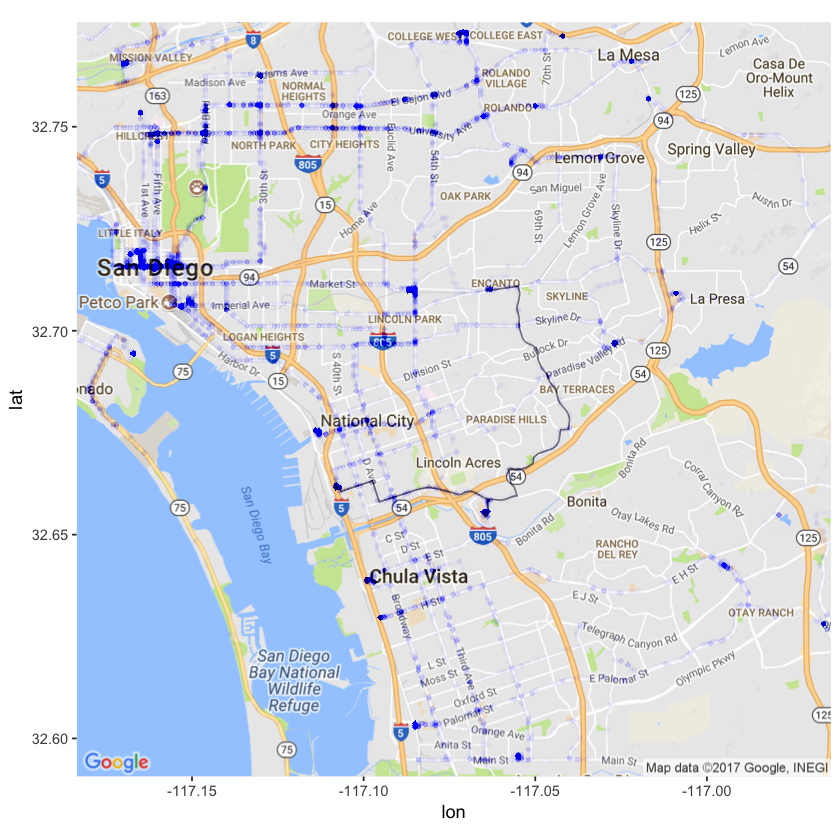

In [60]:
shape_check_id <- as.character(trip$shape_id[1])
shape_check <- shapes[which(shapes$shape_id==shape_check_id),]

size_bbox <- 2.0
bbox <- make_bbox(lon = trip_ext$stop_lon, lat = trip_ext$stop_lat, f = size_bbox)
sq_map <- get_map(location = bbox, maptype = "roadmap", source = "google")
ggmap(sq_map) + geom_path(data = shape_check, mapping = aes(x = shape_pt_lon, y = shape_pt_lat), color = "black", alpha = 0.5) + geom_point(data = trip_ext, mapping = aes(x = stop_lon, y = stop_lat), color = "red", alpha = 0.01) + geom_point(data = trip_feed, mapping = aes(x = longitude, y = latitude), color = "blue", alpha = 0.005)

In [2]:
out_df <- read.csv("/Users/willan/Desktop/SDMTS/output.txt")

In [6]:
tripp <- out_df[out_df$trip_id == 12341775,]
tripp <- tripp[complete.cases(tripp),]

In [21]:
?geom_segment

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.8693,-117.2265&zoom=15&size=640x640&scale=2&maptype=roadmap&language=en-EN


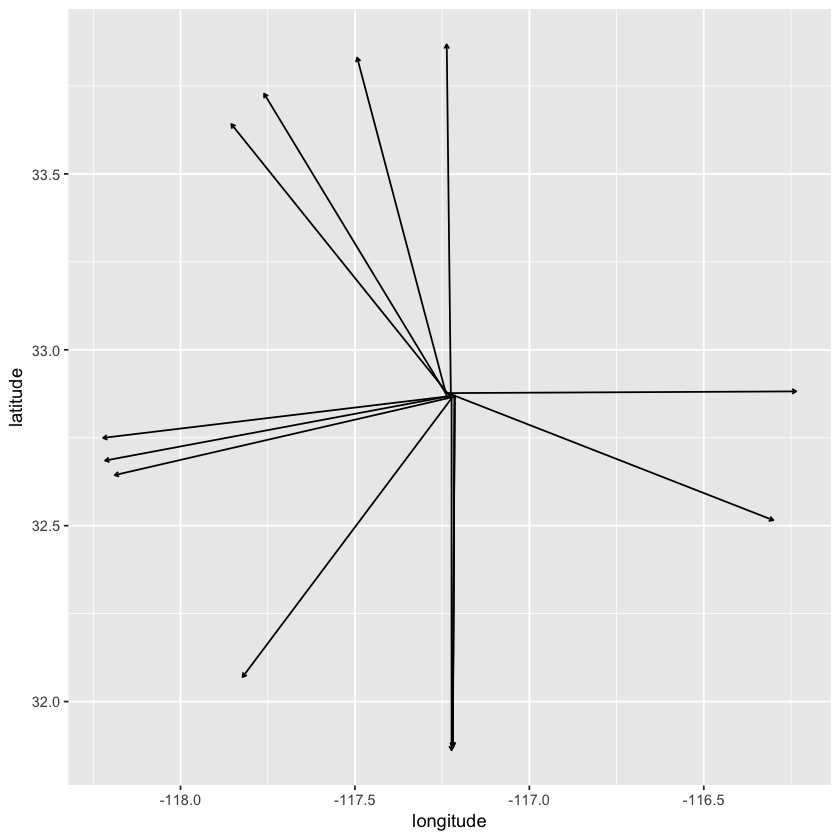

In [20]:
size_bbox <- 0.1
bbox <- make_bbox(lon = tripp$longitude, lat = tripp$latitude, f = size_bbox)
sq_map <- get_map(location = bbox, maptype = "roadmap", source = "google")
ggplot(data=tripp, aes(x=longitude, y=latitude)) + geom_segment(aes(xend=longitude+v_lon, yend=latitude+v_lat), arrow = arrow(length = unit(0.1,"cm")))

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.899598,-116.728915&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Warning message:
“Removed 117 rows containing missing values (geom_point).”

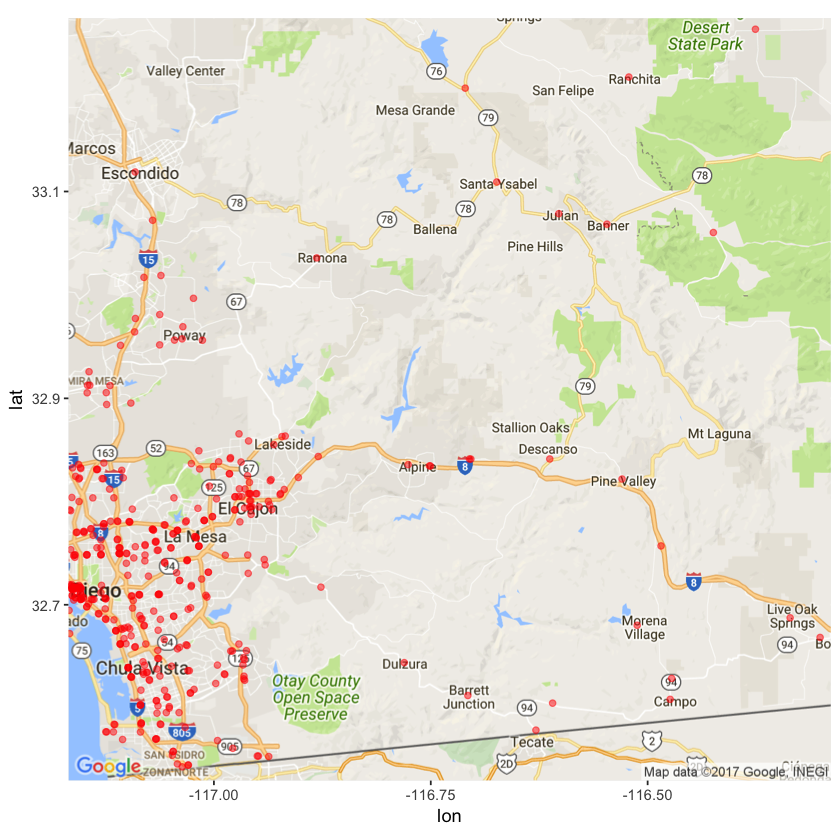

In [66]:
places_df <- read.csv("/Users/willan/Desktop/SDMTS/Static_Info/places.txt")
size_bbox <- 0.1
bbox <- make_bbox(lon = places_df$place_long, lat = places_df$place_lat, f = size_bbox)
sq_map <- get_map(location = bbox, maptype = "roadmap", source = "google")
ggmap(sq_map) + geom_point(data = places_df, mapping = aes(x = place_long, y = place_lat), color = "red", alpha = 0.5)

In [56]:
head(places_df)

place_id,place_name,reference_place,place_lat,place_long
10tbro,10th Ave & Broadway,,32.71620,-117.1558
10thb,10th Ave & B St,,32.71887,-117.1557
11tbro,11th Ave & Broadway,,32.71627,-117.1546
11thb,11th Ave & B St,,32.71783,-117.1546
12tS_N,Imperial Transit,12tS,32.70580,-117.1531
12tS_S,Imperial Transit,12tS,32.70564,-117.1533


In [59]:
bbox

left     bottom      right        top 
-119.45109   31.11476 -114.00674   34.68444